In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv('file:///F:/android-games.csv')
df.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire - The Cobra,80678661,500.0 M,4.33,2.9,7.9,0.0,GAME ACTION,61935712,4478738,2795172,1814999,9654037,False
1,2,PUBG MOBILE: Graffiti Prank,35971961,100.0 M,4.24,2.0,3.1,0.0,GAME ACTION,26670566,2109631,1352610,893674,4945478,False
2,3,Mobile Legends: Bang Bang,25836869,100.0 M,4.08,1.6,3.3,0.0,GAME ACTION,17850942,1796761,1066095,725429,4397640,False
3,4,Brawl Stars,17181659,100.0 M,4.27,4.1,6.6,0.0,GAME ACTION,12493668,1474319,741410,383478,2088781,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14237554,100.0 M,4.33,0.8,1.8,0.0,GAME ACTION,9657878,2124544,1034025,375159,1045945,False


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   float64
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(4), int64(7), object(3)
memory usage: 191.0+ KB


In [6]:
df.isnull().sum()

rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64

In [7]:
df.describe()

,rank,total ratings,average rating,growth (30 days),growth (60 days),price,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
count,1730.000000,1.730000e+03,1730.000000,1730.000000,1730.000000,1730.000000,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03
mean,50.475723,1.101182e+06,4.313410,193.167341,3.969249,0.012965,7.883837e+05,1.216466e+05,5.954986e+04,2.796247e+04,1.036364e+05
std,28.941630,3.311738e+06,0.253545,4775.617650,18.912904,0.243492,2.483061e+06,2.955701e+05,1.447400e+05,7.676625e+04,3.589869e+05
min,1.000000,3.823800e+04,3.090000,0.000000,0.000000,0.000000,2.189800e+04,2.441000e+03,7.070000e+02,2.880000e+02,5.270000e+02
25%,25.000000,1.879988e+05,4.180000,0.100000,0.300000,0.000000,1.358290e+05,2.180200e+04,1.027775e+04,4.529500e+03,1.356075e+04
50%,51.000000,4.576750e+05,4.330000,0.500000,1.000000,0.000000,3.109435e+05,5.464350e+04,2.665850e+04,1.133050e+04,3.569400e+04
75%,75.750000,9.443342e+05,4.490000,1.600000,3.300000,0.000000,6.511310e+05,1.095648e+05,5.581750e+04,2.526650e+04,8.632625e+04
max,100.000000,8.067866e+07,4.910000,140394.400000,605.100000,7.490000,6.193571e+07,5.397273e+06,2.795172e+06,1.814999e+06,9.654037e+06


In [13]:
df['paid'].value_counts()

False    1723
True        7
Name: paid, dtype: int64

False    1723
True        7
Name: paid, dtype: int64

In [17]:
df[df['paid'] == True].sort_values(by = 'price', ascending = False)

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
211,12,Minecraft,3999232,10.0 M,4.54,1.4,2.8,7.49,GAME ARCADE,3214765,312995,138682,70661,262126,True
153,54,Terraria,317546,1.0 M,4.65,1.0,2.3,4.99,GAME ADVENTURE,264563,24837,10184,4387,13572,True
477,64,Reigns,146504,500.0 k,4.58,0.1,0.2,2.99,GAME CARD,108627,25330,5696,2743,4105,True
261,62,Geometry Dash,767518,1.0 M,4.62,0.6,1.2,1.99,GAME ARCADE,623950,73997,25169,9705,34694,True
869,46,Cytus II,109687,1.0 M,4.59,1.0,2.2,1.99,GAME MUSIC,86420,12246,4534,1999,4484,True
1588,65,Trivia Crack (No Ads),74594,500.0 k,4.58,0.9,2.2,1.99,GAME TRIVIA,55411,12625,3123,1117,2315,True
91,92,Hitman Sniper,848831,10.0 M,4.41,0.3,0.8,0.99,GAME ACTION,607502,115334,48040,19224,58729,True


In [19]:
paid_games = df[df['paid'] == True]
paid_games.describe()

,rank,total ratings,average rating,growth (30 days),growth (60 days),price,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
count,7.000000,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.000000e+00,7.000000,7.000000,7.000000,7.000000
mean,56.428571,8.948446e+05,4.567143,0.757143,1.671429,3.204286,7.087483e+05,82480.571429,33632.571429,15690.857143,54289.285714
std,24.206453,1.404642e+06,0.077398,0.450397,0.946422,2.270410,1.130571e+06,108543.298241,49027.945799,25051.010109,93948.601940
min,12.000000,7.459400e+04,4.410000,0.100000,0.200000,0.990000,5.541100e+04,12246.000000,3123.000000,1117.000000,2315.000000
25%,50.000000,1.280955e+05,4.560000,0.450000,1.000000,1.990000,9.752350e+04,18731.000000,5115.000000,2371.000000,4294.500000
50%,62.000000,3.175460e+05,4.580000,0.900000,2.200000,1.990000,2.645630e+05,25330.000000,10184.000000,4387.000000,13572.000000
75%,64.500000,8.081745e+05,4.605000,1.000000,2.250000,3.990000,6.157260e+05,94665.500000,36604.500000,14464.500000,46711.500000
max,92.000000,3.999232e+06,4.650000,1.400000,2.800000,7.490000,3.214765e+06,312995.000000,138682.000000,70661.000000,262126.000000


In [20]:
paid_games.median()

rank                    62.00
total ratings       317546.00
average rating           4.58
growth (30 days)         0.90
growth (60 days)         2.20
price                    1.99
5 star ratings      264563.00
4 star ratings       25330.00
3 star ratings       10184.00
2 star ratings        4387.00
1 star ratings       13572.00
paid                     1.00
dtype: float64

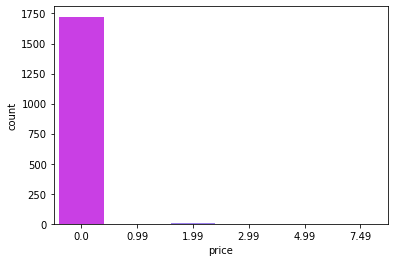

In [21]:
sns.countplot(df['price'],palette='cool_r')

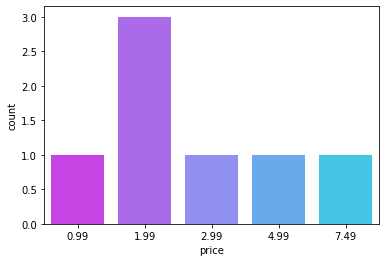

In [22]:
sns.countplot(paid_games['price'],palette='cool_r')

In [23]:
df['category'].unique()

array(['GAME ACTION', 'GAME ADVENTURE', 'GAME ARCADE', 'GAME BOARD',
       'GAME CARD', 'GAME CASINO', 'GAME CASUAL', 'GAME EDUCATIONAL',
       'GAME MUSIC', 'GAME PUZZLE', 'GAME RACING', 'GAME ROLE PLAYING',
       'GAME SIMULATION', 'GAME SPORTS', 'GAME STRATEGY', 'GAME TRIVIA',
       'GAME WORD'], dtype=object)

In [24]:
df['category'].value_counts()

GAME CARD            122
GAME WORD            106
GAME CASUAL          102
GAME BOARD           100
GAME STRATEGY        100
GAME TRIVIA          100
GAME SIMULATION      100
GAME ACTION          100
GAME ADVENTURE       100
GAME ARCADE          100
GAME ROLE PLAYING    100
GAME MUSIC           100
GAME CASINO          100
GAME RACING          100
GAME SPORTS          100
GAME PUZZLE          100
GAME EDUCATIONAL     100
Name: category, dtype: int64

In [25]:
categories_df = df.groupby(['category'], as_index = False).mean().drop(labels = 'rank', axis = 1).drop(labels = 'paid', axis = 1)
categories_df

,category,total ratings,average rating,growth (30 days),growth (60 days),price,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
0,GAME ACTION,4.133757e+06,4.246100,1452.539000,2.569000,0.009900,2.974529e+06,359160.520000,198417.800000,109798.300000,491848.980000
1,GAME ADVENTURE,9.197175e+05,4.264200,30.868000,4.305000,0.049900,6.484247e+05,103462.420000,51665.380000,24650.120000,91512.380000
2,GAME ARCADE,1.851670e+06,4.294900,23.242000,3.091000,0.094800,1.337318e+06,194447.470000,104659.430000,49336.250000,165906.750000
3,GAME BOARD,4.708535e+05,4.347100,157.328000,4.501000,0.000000,3.385803e+05,51618.750000,23180.920000,10893.000000,46578.030000
4,GAME CARD,3.217771e+05,4.421066,2.028689,2.863934,0.024508,2.290758e+05,45030.131148,16209.901639,6788.516393,24670.319672
5,GAME CASINO,3.711927e+05,4.437800,2.226000,3.352000,0.000000,2.748301e+05,41352.810000,18641.410000,7763.390000,28602.500000
6,GAME CASUAL,2.496518e+06,4.335196,19.771569,2.099020,0.000000,1.812148e+06,287281.205882,134767.215686,59794.049020,202524.960784
7,GAME EDUCATIONAL,1.424358e+05,4.253600,99.569000,13.636000,0.000000,1.010035e+05,13420.860000,7867.360000,4722.060000,15419.620000
8,GAME MUSIC,2.245122e+05,4.180300,2.477000,7.006000,0.019900,1.547905e+05,23005.390000,13782.860000,7316.530000,25614.320000
9,GAME PUZZLE,9.839270e+05,4.394200,2.232000,2.153000,0.000000,7.082231e+05,128189.110000,58375.640000,23546.900000,65589.710000


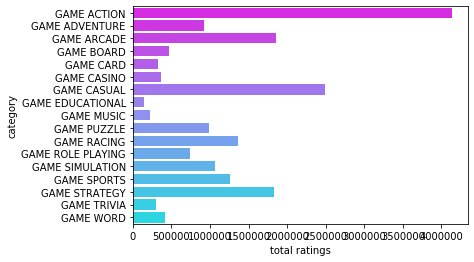

In [29]:
sns.barplot(x='total ratings',y='category',data=categories_df,palette='cool_r')

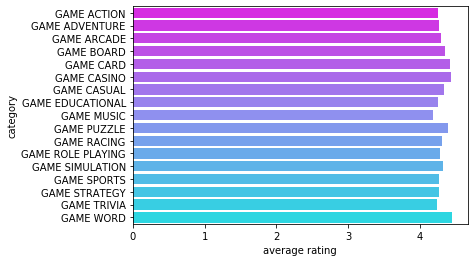

In [28]:
sns.barplot(x='average rating',y='category',data=categories_df,palette='cool_r')

In [30]:
growth_30_days = df.groupby('category', as_index=False)['growth (30 days)'].mean()
growth_30_days

,category,growth (30 days)
0,GAME ACTION,1452.539000
1,GAME ADVENTURE,30.868000
2,GAME ARCADE,23.242000
3,GAME BOARD,157.328000
4,GAME CARD,2.028689
5,GAME CASINO,2.226000
6,GAME CASUAL,19.771569
7,GAME EDUCATIONAL,99.569000
8,GAME MUSIC,2.477000
9,GAME PUZZLE,2.232000


In [31]:
growth_60_days = df.groupby('category', as_index=False)['growth (60 days)'].mean()
growth_60_days

,category,growth (60 days)
0,GAME ACTION,2.569000
1,GAME ADVENTURE,4.305000
2,GAME ARCADE,3.091000
3,GAME BOARD,4.501000
4,GAME CARD,2.863934
5,GAME CASINO,3.352000
6,GAME CASUAL,2.099020
7,GAME EDUCATIONAL,13.636000
8,GAME MUSIC,7.006000
9,GAME PUZZLE,2.153000


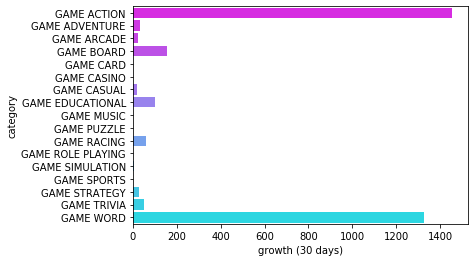

In [32]:
sns.barplot(x='growth (30 days)',y='category',data=categories_df,palette='cool_r')

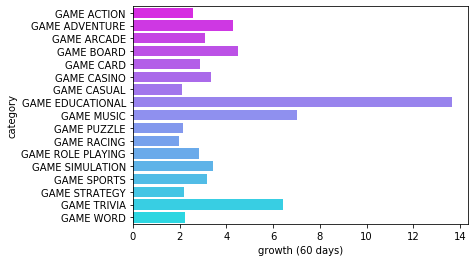

In [33]:
sns.barplot(x='growth (60 days)',y='category',data=categories_df,palette='cool_r')

In [40]:
a = [] # empty list

# average number of ratings of paid games

a.append( df[df['paid'] == True]['total ratings'].mean() )

# average number of ratings of free games

a.append( df[df['paid'] == False]['total ratings'].mean() )

a

[894844.5714285715, 1102019.8224027858]

In [53]:
growth_30_days = df.groupby('category', as_index=False)['growth (30 days)'].mean()

In [54]:
growth_30_days

,category,growth (30 days)
0,GAME ACTION,1452.539000
1,GAME ADVENTURE,30.868000
2,GAME ARCADE,23.242000
3,GAME BOARD,157.328000
4,GAME CARD,2.028689
5,GAME CASINO,2.226000
6,GAME CASUAL,19.771569
7,GAME EDUCATIONAL,99.569000
8,GAME MUSIC,2.477000
9,GAME PUZZLE,2.232000
